In [2]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [19]:
print ('tensorflow_version: ',tf.__version__)
print ('keras_version: ',keras.__version__)

tensorflow_version:  1.7.0
keras_version:  2.2.0


In [ ]:
#The data is for a random sample of the wild flower iris setosa.
#In the following data, X = sepal width (cm),Y = sepal length (cm).
data = pd.read_csv('x01.txt', header=None, names=['width', 'length'])  
data.head()


In [14]:
data.describe()

,width,length
count,45.000000,45.000000
mean,3.386667,4.993333
std,0.479394,0.443847
min,2.100000,4.000000
25%,3.200000,4.700000
50%,3.400000,5.000000
75%,3.600000,5.300000
max,4.400000,5.800000


In [15]:
data.shape[0]

45

In [17]:
data_x,data_y = data['width'],data['length']


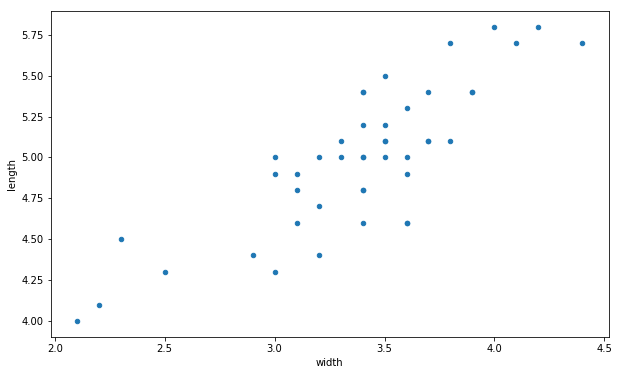

In [19]:
data.plot(kind='scatter', x='width', y='length', figsize=(10,6))

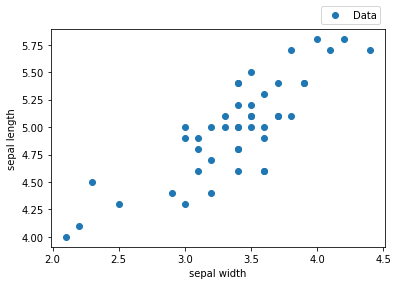

In [20]:
plt.plot(data_x,data_y,'o')
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.legend(['Data'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [21]:
#simple linear reg model, a = w.x + b

In [22]:
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mse'])
#model.compile(loss='mean_squared_error', optimizer='sgd',metrics=['mse'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
#to store logs
tensorboard = TensorBoard(log_dir="./simple_lin_reg")
# Train the model
hist = model.fit(data_x,data_y, batch_size=1, epochs=100, shuffle=False,callbacks=[tensorboard])

Instructions for updating:
Use the retry module or similar alternatives.
Epoch 1/100
45/45 [==============================] - 0s 7ms/step - loss: 22.6332 - mean_squared_error: 22.6332
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 20.7794 - mean_squared_error: 20.7794
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 19.0588 - mean_squared_error: 19.0588
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 17.4136 - mean_squared_error: 17.4136
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 15.8434 - mean_squared_error: 15.8434
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 14.3484 - mean_squared_error: 14.3484
Epoch 7/100
45/45 [==============================] - 0s 997us/step - loss: 12.9285 - mean_squared_error: 12.9285
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 11.5837 - mean_squared_error: 11.5837
Epoch 9/100
45/45 [==================

45/45 [==============================] - 0s 1ms/step - loss: 0.0897 - mean_squared_error: 0.0897    
Epoch 71/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0896 - mean_squared_error: 0.0896    
Epoch 72/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0895 - mean_squared_error: 0.0895    
Epoch 73/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0894 - mean_squared_error: 0.0894    
Epoch 74/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0893 - mean_squared_error: 0.0893    
Epoch 75/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0892 - mean_squared_error: 0.0892    
Epoch 76/100
45/45 [==============================] - 0s 716us/step - loss: 0.0891 - mean_squared_error: 0.0891  
Epoch 77/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0890 - mean_squared_error: 0.0890    
Epoch 78/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0889 - mean_squared_error

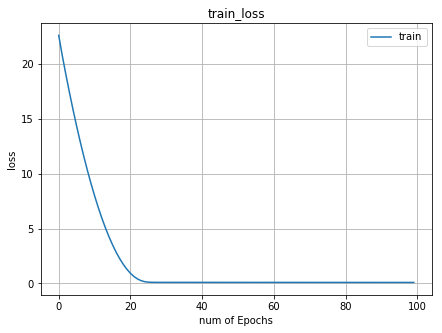

In [25]:
# visualizing losses and accuracy
num_epoch = 100
train_loss=hist.history['loss']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

In [26]:
#Model Evaluation
x_test = np.array(data_x)
y_test = np.array(data_y)
score = model.evaluate(x_test, y_test)
print('Test Score:', score)

45/45 [==============================] - 0s 3ms/step
Test Score: [0.0858241523305575, 0.0858241523305575]


In [27]:
#test 
x_test = np.array(data_x[0:1])
y_test = np.array(data_y[0:1])
y_test_predicted=model.predict(x_test)
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)

predicted_value:  [[5.107539]]
true_value:  [5.1]


In [28]:
#weights
#model.get_weights()
#params=model.get_weights()
params=model.layers[0].get_weights()
params


[array([[1.0960288]], dtype=float32), array([1.2714386], dtype=float32)]

In [29]:
model.get_weights()

[array([[1.0960288]], dtype=float32), array([1.2714386], dtype=float32)]

In [30]:
x_test = np.array(data_x)
y_test = np.array(data_y)
y_test_predicted=model.predict(x_test)
#y_test_predicted

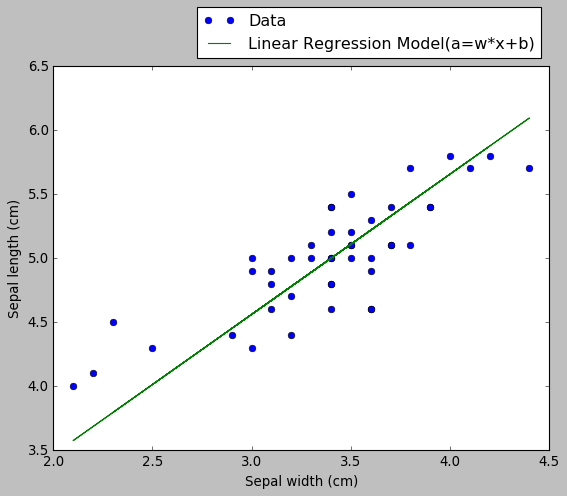

In [32]:
plt.plot(x_test,y_test,'o', x_test,y_test_predicted,"-")
plt.xlabel("Sepal width (cm)")
plt.ylabel("Sepal length (cm)")
plt.legend(['Data', 'Linear Regression Model(a=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [33]:
model.save('simple_lin_reg_model_1.h5')

In [52]:
from keras.models import load_model
loaded_model=load_model('simple_lin_reg_model.h5')
loaded_model.get_weights()

[array([[0.80627126]], dtype=float32), array([-0.72967607], dtype=float32)]